# CNN (key concepts)
Actions we can take to overfit a model:
* Increase the number of convolutional layers
* Increase the number of convolutional filters
* Add another dense layer to the output of our falttened layer

Reduce overfitting (reducing overfitting is also known as regularization):
* Add data augmentation
 * Usually only performed on the training data
 * Images are left as they are in the directories but are modified as they are loaded into the model
* Add regularization layers (such as MaxPool2D)
* Add more data

Actions to take that could improve a model:
* More data
* Data augmentation
* Better data
* Use transfer learning
* Increase the number of model layers (add more Conv2D/MaxPool2D layers)
* Increase the number of filters in each convolutional layer (from 10 to 32 or more)
* Train for longer (more epochs)
* Find and ideal learning rate

Conv2D layer:
* filters - 10, 32, 64, 128 (higher values lead to more complex models)
* kenel_size - 3, 5, 7 (lower values learn smaller features, higher values learn larger features)
* padding - same (output shape is same as input shape) or valid (output shape compressed)
* strides - 1 (default). If images are not informationally dense, strides may be higher, if they are informationally dense, then better to keep lower values of strides

# Process to follow to attack a problem
Steps:
* Create a base model
* Beat the base model by overfitting a larger model
* Reduce overfitting

# Import libraries

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
print(tf.__version__)

2.6.0


# Constants

In [ ]:
DATASET_NAME = 'malaria'
RANDOM_STATE = 33
BATCH_SIZE = 32
EPOCHS = 50
IMG_SIZE = 100
IMG_DEPTH = 3
BEST_LR_INITIAL = 1e-5

# Working with the TensorFlow dataset
https://www.tensorflow.org/datasets/catalog/malaria?hl=en

## Load data

In [ ]:
print(tfds.list_builders())

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'arc', 'bair_robot_pushing_small', 'bccd', 'beans', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'blimp', 'bool_q', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'coqa', 'cos_e', 'cosmos_qa', 'covid19sum', 'crema_d', 'curated_breast_imaging_ddsm', 'cycle_gan', 'deep_weeds', 'definite_pronoun_resolution', 'dementiabank', 'diabetic_retinopathy_detection', 'div2k', 'dmlab', 'downsampled_imagenet', 'dsprites', 'dtd', 'duke_ultrasound', 'emnist', 'eraser_multi_r

In [ ]:
(ds_train_raw, ds_val_raw, ds_test_raw), ds_info = tfds.load(
    name=DATASET_NAME,
    split=['train[:70%]', 'train[70%:90%]', 'train[90%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True)

# access relevant metadata with DatasetInfo
print(ds_info)

tfds.core.DatasetInfo(
    name='malaria',
    version=1.0.0,
    description='The Malaria dataset contains a total of 27,558 cell images
with equal instances of parasitized and uninfected cells from the thin blood 
smear slide images of segmented cells.',
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=27558,
    splits={
        'train': 27558,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward 
      improved malaria parasite detection in thin blood smear images},
      author={Rajaraman, Sivaramakrishnan and Antani, Sameer K and Poostchi, Mahdieh
      and Silamut, Kamolrat and Hossain, Md A and Maude, Richard J and Jaeger, 
      Stefan and Thoma, George R}

In [ ]:
NUM_CLASSES = ds_info.features['label'].num_classes
print('NUM_CLASSES = ', NUM_CLASSES)

NAMES_CLASSES = ds_info.features['label'].names
print('NAMES_CLASSES = ', NAMES_CLASSES)

for item in NAMES_CLASSES:
  print(item, ' = ', ds_info.features['label'].str2int(item))

NUM_TRAIN_EXAMPLES = len(ds_train_raw)
print('NUM_TRAIN_EXAMPLES = ', NUM_TRAIN_EXAMPLES)
ds_filtered = list(ds_train_raw.filter(lambda image, label: label == 0).as_numpy_iterator())
print('NUM_TRAIN_EXAMPLES_parasitized = ', len(ds_filtered))
ds_filtered = list(ds_train_raw.filter(lambda image, label: label == 1).as_numpy_iterator())
print('NUM_TRAIN_EXAMPLES_uninfected = ', len(ds_filtered))

NUM_VAL_EXAMPLES = len(ds_val_raw)
print('NUM_VAL_EXAMPLES = ', NUM_VAL_EXAMPLES)
ds_filtered = list(ds_val_raw.filter(lambda image, label: label == 0).as_numpy_iterator())
print('NUM_VAL_EXAMPLES_parasitized = ', len(ds_filtered))
ds_filtered = list(ds_val_raw.filter(lambda image, label: label == 1).as_numpy_iterator())
print('NUM_VAL_EXAMPLES_uninfected = ', len(ds_filtered))

NUM_TEST_EXAMPLES = len(ds_test_raw)
print('NUM_TEST_EXAMPLES = ', NUM_TEST_EXAMPLES)
ds_filtered = list(ds_test_raw.filter(lambda image, label: label == 0).as_numpy_iterator())
print('NUM_TEST_EXAMPLES_parasitized = ', len(ds_filtered))
ds_filtered = list(ds_test_raw.filter(lambda image, label: label == 1).as_numpy_iterator())
print('NUM_TEST_EXAMPLES_uninfected = ', len(ds_filtered))

STEPS_PER_EPOCH = NUM_TRAIN_EXAMPLES//BATCH_SIZE
print('STEPS_PER_EPOCH = ', STEPS_PER_EPOCH)

NUM_CLASSES =  2
NAMES_CLASSES =  ['parasitized', 'uninfected']
parasitized  =  0
uninfected  =  1
NUM_TRAIN_EXAMPLES =  19291
NUM_TRAIN_EXAMPLES_parasitized =  9641
NUM_TRAIN_EXAMPLES_uninfected =  9650
NUM_VAL_EXAMPLES =  5511
NUM_VAL_EXAMPLES_parasitized =  2767
NUM_VAL_EXAMPLES_uninfected =  2744
NUM_TEST_EXAMPLES =  2756
NUM_TEST_EXAMPLES_parasitized =  1371
NUM_TEST_EXAMPLES_uninfected =  1385
STEPS_PER_EPOCH =  602


The train, test and validation splits are balanced.

In [ ]:
assert isinstance(ds_train_raw, tf.data.Dataset)
print(type(ds_train_raw))
assert isinstance(ds_val_raw, tf.data.Dataset)
print(type(ds_val_raw))
assert isinstance(ds_test_raw, tf.data.Dataset)
print(type(ds_test_raw))

<class 'tensorflow.python.data.ops.dataset_ops._OptionsDataset'>
<class 'tensorflow.python.data.ops.dataset_ops._OptionsDataset'>
<class 'tensorflow.python.data.ops.dataset_ops._OptionsDataset'>


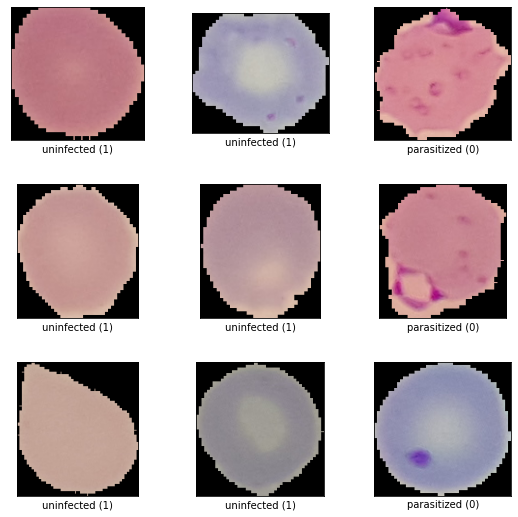

In [ ]:
fig = tfds.show_examples(ds_train_raw, ds_info)

In [ ]:
print('----- ds_train_raw -----')
for i, example in enumerate(ds_train_raw.take(2)):
    print('Image {} shape: {} label: {}'.format(i+1, example[0].shape, example[1]))
print('----- ds_val_raw -----')
for i, example in enumerate(ds_val_raw.take(2)):
    print('Image {} shape: {} label: {}'.format(i+1, example[0].shape, example[1]))
print('----- ds_test_raw -----')
for i, example in enumerate(ds_test_raw.take(2)):
    print('Image {} shape: {} label: {}'.format(i+1, example[0].shape, example[1]))

----- ds_train_raw -----
Image 1 shape: (133, 127, 3) label: 1
Image 2 shape: (118, 118, 3) label: 0
----- ds_val_raw -----
Image 1 shape: (121, 115, 3) label: 0
Image 2 shape: (151, 115, 3) label: 1
----- ds_test_raw -----
Image 1 shape: (130, 133, 3) label: 1
Image 2 shape: (145, 130, 3) label: 1


In [ ]:
for image, label in ds_train_raw.take(1):
  print(image)

tf.Tensor(
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]], shape=(145, 148, 3), dtype=uint8)


## Preprocess data

In [ ]:
def image_preprocess(image, label):
    # convert to tf.float32
    image = tf.cast(image, tf.float32)
    # normalize
    image = (image/255.0)
    # resize image
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    return image, label

ds_train = ds_train_raw.map(image_preprocess)
ds_val = ds_val_raw.map(image_preprocess)
ds_test = ds_test_raw.map(image_preprocess)

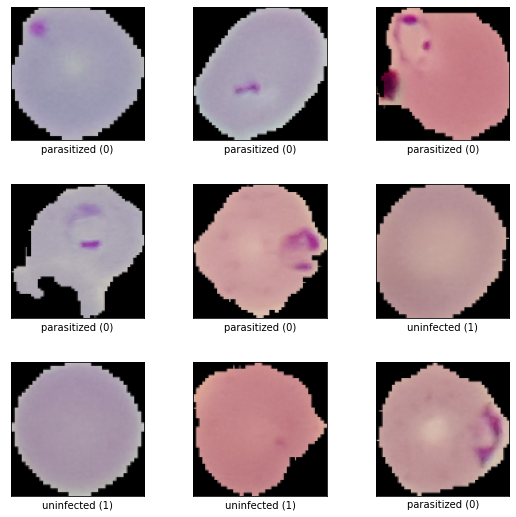

In [ ]:
fig = tfds.show_examples(ds_train, ds_info)

In [ ]:
print('----- ds_train -----')
for i, example in enumerate(ds_train.take(2)):
    print('Image {} shape: {} label: {}'.format(i+1, example[0].shape, example[1]))
print('----- ds_val -----')
for i, example in enumerate(ds_val.take(2)):
    print('Image {} shape: {} label: {}'.format(i+1, example[0].shape, example[1]))
print('----- ds_test -----')
for i, example in enumerate(ds_test.take(2)):
    print('Image {} shape: {} label: {}'.format(i+1, example[0].shape, example[1]))

----- ds_train -----
Image 1 shape: (100, 100, 3) label: 0
Image 2 shape: (100, 100, 3) label: 1
----- ds_val -----
Image 1 shape: (100, 100, 3) label: 1
Image 2 shape: (100, 100, 3) label: 0
----- ds_test -----
Image 1 shape: (100, 100, 3) label: 1
Image 2 shape: (100, 100, 3) label: 1


In [ ]:
for image, label in ds_train.take(1):
  print(image)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(100, 100, 3), dtype=float32)


In [ ]:
ds_train_batches = ds_train.batch(BATCH_SIZE)
ds_val_batches = ds_val.batch(BATCH_SIZE)
ds_test_batches = ds_test.batch(BATCH_SIZE)

## Data Augmentation layers

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(1.0)
])

## Helper functions

In [ ]:
# helper functions to plot the validation and training loss and accuracy curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  fig, (ax1, ax2) = plt.subplots(1, 2)

  # plot loss
  ax1.plot(epochs, loss, label='tra_loss')
  ax1.plot(epochs, val_loss, label='val_loss')
  ax1.set_title('Loss')
  ax1.set(xlabel='Epochs', ylabel='Loss')
  ax1.legend()

  # plot accuracy
  ax2.plot(epochs, accuracy, label='tra_acc')
  ax2.plot(epochs, val_accuracy, label='val_acc')
  ax2.set_title('Accuracy')
  ax2.set(xlabel='Accuracy', ylabel='Loss')
  ax2.legend()

## CNN model_00 (baseline)
Base model

### Function create model

In [ ]:
def make_model():
  model = tf.keras.models.Sequential(
      [tf.keras.layers.Conv2D(filters=10, kernel_size=3, padding='valid', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, IMG_DEPTH)),
       tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
       tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(1, activation='sigmoid')])
  return model

### Train the model

In [ ]:
# set random seed
tf.random.set_seed(RANDOM_STATE)

# create the model
model_00_00 = make_model()

In [ ]:
# compile the model
model_00_00.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

In [ ]:
# create callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10)
]

In [ ]:
# fit the model
history_00_00 = model_00_00.fit(
    ds_train_batches,
    epochs=EPOCHS,
    validation_data=ds_val_batches,
    callbacks=callbacks)

Epoch 1/50
603/603 [==============================] - 56s 46ms/step - loss: 0.6443 - accuracy: 0.6251 - val_loss: 0.5557 - val_accuracy: 0.7318
Epoch 2/50
603/603 [==============================] - 27s 45ms/step - loss: 0.5402 - accuracy: 0.7345 - val_loss: 0.5583 - val_accuracy: 0.8940
Epoch 3/50
603/603 [==============================] - 27s 45ms/step - loss: 0.4390 - accuracy: 0.8284 - val_loss: 0.4186 - val_accuracy: 0.8469
Epoch 4/50
603/603 [==============================] - 27s 45ms/step - loss: 0.4020 - accuracy: 0.8463 - val_loss: 0.4360 - val_accuracy: 0.8683
Epoch 5/50
603/603 [==============================] - 27s 45ms/step - loss: 0.3916 - accuracy: 0.8471 - val_loss: 0.4573 - val_accuracy: 0.8360
Epoch 6/50
603/603 [==============================] - 27s 45ms/step - loss: 0.3593 - accuracy: 0.8582 - val_loss: 0.5055 - val_accuracy: 0.8213
Epoch 7/50
603/603 [==============================] - 27s 45ms/step - loss: 0.2683 - accuracy: 0.9049 - val_loss: 0.5950 - val_accuracy:

In [ ]:
model_00_00.evaluate(ds_test_batches)

87/87 [==============================] - 3s 32ms/step - loss: 0.8096 - accuracy: 0.8527


[0.8096360564231873, 0.8526850342750549]

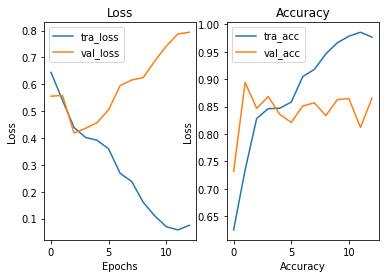

In [ ]:
# check out the loss curves of model
plot_loss_curves(history_00_00)

#### Results

Time training = 6,36 min. Model overfits. From this point we will try to beat this model. We will reduce the patience argument of the EarlyStopping callback to 5 for speeding up the tests performed

### Function create model (with data augmentation)
Let's see if model_00_00 improves by introducing Data Augmentation

In [ ]:
def make_model():
  model = tf.keras.models.Sequential(
      [data_augmentation,
       tf.keras.layers.Conv2D(filters=10, kernel_size=3, padding='valid', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, IMG_DEPTH)),
       tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
       tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(1, activation='sigmoid')])
  return model

### Train the model (with data augmentation)

In [ ]:
# set random seed
tf.random.set_seed(RANDOM_STATE)

# create the model
model_00_01 = make_model()

In [ ]:
# compile the model
model_00_01.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

In [ ]:
# create callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5)
]

In [ ]:
# fit the model
history_00_01 = model_00_01.fit(
    ds_train_batches,
    epochs=EPOCHS,
    validation_data=ds_val_batches,
    callbacks=callbacks)

Epoch 1/50
603/603 [==============================] - 29s 46ms/step - loss: 0.6397 - accuracy: 0.6501 - val_loss: 0.6782 - val_accuracy: 0.5591
Epoch 2/50
603/603 [==============================] - 28s 46ms/step - loss: 0.6750 - accuracy: 0.5761 - val_loss: 0.6636 - val_accuracy: 0.6037
Epoch 3/50
603/603 [==============================] - 28s 46ms/step - loss: 0.6368 - accuracy: 0.6418 - val_loss: 0.6678 - val_accuracy: 0.5948
Epoch 4/50
603/603 [==============================] - 28s 46ms/step - loss: 0.6558 - accuracy: 0.6109 - val_loss: 0.5065 - val_accuracy: 0.7520
Epoch 5/50
603/603 [==============================] - 28s 46ms/step - loss: 0.5285 - accuracy: 0.7693 - val_loss: 0.5664 - val_accuracy: 0.7137
Epoch 6/50
603/603 [==============================] - 28s 46ms/step - loss: 0.4746 - accuracy: 0.8018 - val_loss: 0.3919 - val_accuracy: 0.8723
Epoch 7/50
603/603 [==============================] - 28s 46ms/step - loss: 0.3977 - accuracy: 0.8538 - val_loss: 0.3940 - val_accuracy:

In [ ]:
model_00_01.evaluate(ds_test_batches)

87/87 [==============================] - 3s 31ms/step - loss: 0.1837 - accuracy: 0.9427


[0.18366658687591553, 0.9426705241203308]

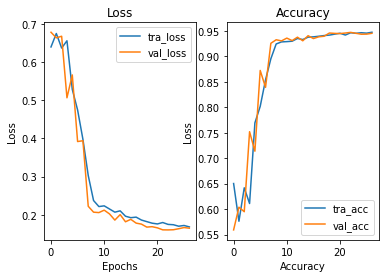

In [ ]:
# check out the loss curves of model
plot_loss_curves(history_00_01)

#### Results
Time training = 12,15 min. Overfitting solved after introducing Data Augmentation. model_00_01 is the new model to beat.

## CNN model_01
Let's see if the model_00_01 improves by increasing the number of model layers:
* Double the number of Conv2D layers (from 3 to 6, keeping the same number of filters, 10)
* Keep Data Augmentation

### Function create model (with data augmentation)

In [ ]:
def make_model():
  model = tf.keras.models.Sequential(
      [data_augmentation,
       tf.keras.layers.Conv2D(filters=10, kernel_size=3, padding='valid', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, IMG_DEPTH)),
       tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
       tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
       tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
       tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
       tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(1, activation='sigmoid')])
  return model

### Train the model (with data augmentation)

In [ ]:
# set random seed
tf.random.set_seed(RANDOM_STATE)

# create the model
model_01_00 = make_model()

In [ ]:
# compile the model
model_01_00.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

In [ ]:
# create callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5)
]

In [ ]:
# fit the model
history_01_00 = model_01_00.fit(
    ds_train_batches,
    epochs=EPOCHS,
    validation_data=ds_val_batches,
    callbacks=callbacks)

Epoch 1/50
603/603 [==============================] - 35s 56ms/step - loss: 0.6900 - accuracy: 0.5200 - val_loss: 0.6931 - val_accuracy: 0.5021
Epoch 2/50
603/603 [==============================] - 33s 55ms/step - loss: 0.6929 - accuracy: 0.5051 - val_loss: 0.6931 - val_accuracy: 0.5021
Epoch 3/50
603/603 [==============================] - 33s 55ms/step - loss: 0.6932 - accuracy: 0.4936 - val_loss: 0.6931 - val_accuracy: 0.5021
Epoch 4/50
603/603 [==============================] - 33s 55ms/step - loss: 0.6943 - accuracy: 0.4981 - val_loss: 0.6931 - val_accuracy: 0.5021
Epoch 5/50
603/603 [==============================] - 33s 55ms/step - loss: 0.6932 - accuracy: 0.4928 - val_loss: 0.6931 - val_accuracy: 0.5021
Epoch 6/50
603/603 [==============================] - 34s 57ms/step - loss: 0.6932 - accuracy: 0.4879 - val_loss: 0.6931 - val_accuracy: 0.5021


In [ ]:
model_01_00.evaluate(ds_test_batches)

87/87 [==============================] - 3s 34ms/step - loss: 0.6932 - accuracy: 0.4975


[0.6931508183479309, 0.49746009707450867]

In [ ]:
model_00_01.evaluate(ds_test_batches)

87/87 [==============================] - 3s 32ms/step - loss: 0.1837 - accuracy: 0.9427


[0.18366657197475433, 0.9426705241203308]

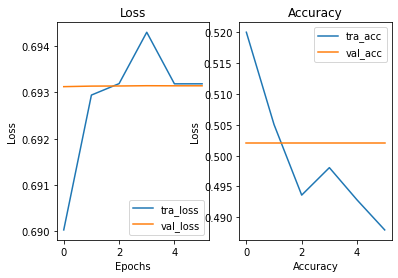

In [ ]:
# check out the loss curves of model
plot_loss_curves(history_01_00)

#### Results
model_01_00 does not learn. model_01_00 does not improve model_00_01. model_00_01 is still the model to beat.

## CNN model_02
Let's see if the model_00_01 improves by increasing the number of model layers:
* Double the number of Conv2D layers (from 3 to 5, keeping the same number of filters, 10)
* Keep Data Augmentation

### Function create model (with data augmentation)

In [ ]:
def make_model():
  model = tf.keras.models.Sequential(
      [data_augmentation,
       tf.keras.layers.Conv2D(filters=10, kernel_size=3, padding='valid', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, IMG_DEPTH)),
       tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
       tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
       tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
       tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(1, activation='sigmoid')])
  return model

### Train the model (with data augmentation)

In [ ]:
# set random seed
tf.random.set_seed(RANDOM_STATE)

# create the model
model_02_00 = make_model()

In [ ]:
# compile the model
model_02_00.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

In [ ]:
# create callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5)
]

In [ ]:
# fit the model
history_02_00 = model_02_00.fit(
    ds_train_batches,
    epochs=EPOCHS,
    validation_data=ds_val_batches,
    callbacks=callbacks)

Epoch 1/50
603/603 [==============================] - 32s 51ms/step - loss: 0.6830 - accuracy: 0.5671 - val_loss: 0.6887 - val_accuracy: 0.5371
Epoch 2/50
603/603 [==============================] - 31s 51ms/step - loss: 0.7176 - accuracy: 0.5578 - val_loss: 0.6850 - val_accuracy: 0.5518
Epoch 3/50
603/603 [==============================] - 31s 51ms/step - loss: 0.6853 - accuracy: 0.5540 - val_loss: 0.6759 - val_accuracy: 0.5803
Epoch 4/50
603/603 [==============================] - 31s 51ms/step - loss: 0.6757 - accuracy: 0.5773 - val_loss: 0.6570 - val_accuracy: 0.6139
Epoch 5/50
603/603 [==============================] - 31s 51ms/step - loss: 0.5207 - accuracy: 0.7394 - val_loss: 0.3904 - val_accuracy: 0.8501
Epoch 6/50
603/603 [==============================] - 31s 52ms/step - loss: 0.3007 - accuracy: 0.8845 - val_loss: 0.2435 - val_accuracy: 0.9095
Epoch 7/50
603/603 [==============================] - 31s 51ms/step - loss: 0.2567 - accuracy: 0.9129 - val_loss: 0.2231 - val_accuracy:

In [ ]:
model_02_00.evaluate(ds_test_batches)

87/87 [==============================] - 3s 32ms/step - loss: 0.1865 - accuracy: 0.9401


[0.1864948272705078, 0.9401306509971619]

In [ ]:
model_00_01.evaluate(ds_test_batches)

87/87 [==============================] - 3s 32ms/step - loss: 0.1837 - accuracy: 0.9427


[0.18366657197475433, 0.9426705241203308]

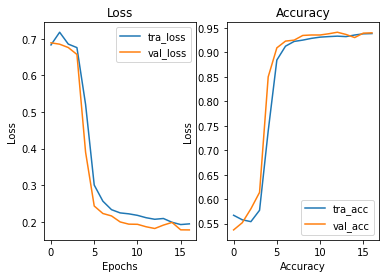

In [ ]:
# check out the loss curves of model
plot_loss_curves(history_02_00)

#### Results
Time training = 8,78 min. model_02_00 does not improve the results of model_00_01.

## CNN model_03
Same as model_02_00 with regularization layers (as MaxPool2D)

### Function create model (with data augmentation)

In [ ]:
def make_model():
  model = tf.keras.models.Sequential(
      [data_augmentation,
       tf.keras.layers.Conv2D(filters=10, kernel_size=3, padding='valid', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, IMG_DEPTH)),
       tf.keras.layers.MaxPooling2D((2, 2)),
       tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
       tf.keras.layers.MaxPooling2D((2, 2)),
       tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
       tf.keras.layers.MaxPooling2D((2, 2)),
       tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
       tf.keras.layers.MaxPooling2D((2, 2)),
       tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
       tf.keras.layers.MaxPooling2D((2, 2)),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(1, activation='sigmoid')])
  return model

### Train the model (with data augmentation)

In [ ]:
# set random seed
tf.random.set_seed(RANDOM_STATE)

# create the model
model_03_00 = make_model()

In [ ]:
# compile the model
model_03_00.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

In [ ]:
# create callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5)
]

In [ ]:
# fit the model
history_03_00 = model_03_00.fit(
    ds_train_batches,
    epochs=EPOCHS,
    validation_data=ds_val_batches,
    callbacks=callbacks)

Epoch 1/50
603/603 [==============================] - 27s 43ms/step - loss: 0.3892 - accuracy: 0.8185 - val_loss: 0.1928 - val_accuracy: 0.9323
Epoch 2/50
603/603 [==============================] - 25s 42ms/step - loss: 0.2034 - accuracy: 0.9332 - val_loss: 0.1665 - val_accuracy: 0.9445
Epoch 3/50
603/603 [==============================] - 26s 43ms/step - loss: 0.1811 - accuracy: 0.9424 - val_loss: 0.1509 - val_accuracy: 0.9496
Epoch 4/50
603/603 [==============================] - 26s 44ms/step - loss: 0.1742 - accuracy: 0.9440 - val_loss: 0.1479 - val_accuracy: 0.9512
Epoch 5/50
603/603 [==============================] - 26s 43ms/step - loss: 0.1669 - accuracy: 0.9480 - val_loss: 0.1431 - val_accuracy: 0.9539
Epoch 6/50
603/603 [==============================] - 26s 43ms/step - loss: 0.1675 - accuracy: 0.9477 - val_loss: 0.1369 - val_accuracy: 0.9541
Epoch 7/50
603/603 [==============================] - 26s 43ms/step - loss: 0.1620 - accuracy: 0.9488 - val_loss: 0.1414 - val_accuracy:

In [ ]:
model_03_00.evaluate(ds_test_batches)

87/87 [==============================] - 3s 31ms/step - loss: 0.1525 - accuracy: 0.9525


[0.1524842083454132, 0.9524673223495483]

In [ ]:
model_02_00.evaluate(ds_test_batches)

87/87 [==============================] - 3s 33ms/step - loss: 0.1865 - accuracy: 0.9401


[0.18649479746818542, 0.9401306509971619]

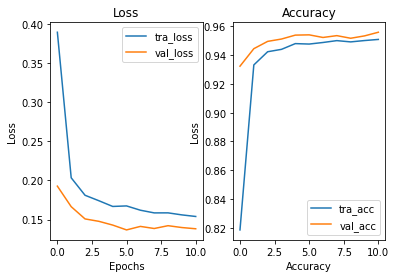

In [ ]:
# check out the loss curves of model
plot_loss_curves(history_03_00)

#### Results
Time training = 4,76 min. model_03_00 improves loss a little. accuracy value also improves a little. model_03_00 is the new model to beat.

## CNN model_04
Same as model_03_00 increasing the number of filters in each convolutional layer (from 10 to 32)

### Function create model (with data augmentation)

In [ ]:
def make_model():
  model = tf.keras.models.Sequential(
      [data_augmentation,
       tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='valid', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, IMG_DEPTH)),
       tf.keras.layers.MaxPooling2D((2, 2)),
       tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
       tf.keras.layers.MaxPooling2D((2, 2)),
       tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
       tf.keras.layers.MaxPooling2D((2, 2)),
       tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
       tf.keras.layers.MaxPooling2D((2, 2)),
       tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
       tf.keras.layers.MaxPooling2D((2, 2)),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(1, activation='sigmoid')])
  return model

### Train the model (with data augmentation)

In [ ]:
# set random seed
tf.random.set_seed(RANDOM_STATE)

# create the model
model_04_00 = make_model()

In [ ]:
# compile the model
model_04_00.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

In [ ]:
# create callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5)
]

In [ ]:
# fit the model
history_04_00 = model_04_00.fit(
    ds_train_batches,
    epochs=EPOCHS,
    validation_data=ds_val_batches,
    callbacks=callbacks)

Epoch 1/50
603/603 [==============================] - 30s 48ms/step - loss: 0.3882 - accuracy: 0.8054 - val_loss: 0.1927 - val_accuracy: 0.9369
Epoch 2/50
603/603 [==============================] - 28s 46ms/step - loss: 0.1840 - accuracy: 0.9402 - val_loss: 0.1509 - val_accuracy: 0.9485
Epoch 3/50
603/603 [==============================] - 28s 47ms/step - loss: 0.1659 - accuracy: 0.9466 - val_loss: 0.1498 - val_accuracy: 0.9485
Epoch 4/50
603/603 [==============================] - 29s 47ms/step - loss: 0.1611 - accuracy: 0.9481 - val_loss: 0.1369 - val_accuracy: 0.9525
Epoch 5/50
603/603 [==============================] - 29s 48ms/step - loss: 0.1546 - accuracy: 0.9500 - val_loss: 0.1342 - val_accuracy: 0.9537
Epoch 6/50
603/603 [==============================] - 28s 47ms/step - loss: 0.1495 - accuracy: 0.9515 - val_loss: 0.1307 - val_accuracy: 0.9550
Epoch 7/50
603/603 [==============================] - 28s 47ms/step - loss: 0.1461 - accuracy: 0.9523 - val_loss: 0.1285 - val_accuracy:

In [ ]:
model_04_00.evaluate(ds_test_batches)

87/87 [==============================] - 3s 32ms/step - loss: 0.1227 - accuracy: 0.9594


[0.12267912179231644, 0.9593613743782043]

In [ ]:
model_03_00.evaluate(ds_test_batches)

87/87 [==============================] - 3s 33ms/step - loss: 0.1525 - accuracy: 0.9525


[0.1524842083454132, 0.9524673223495483]

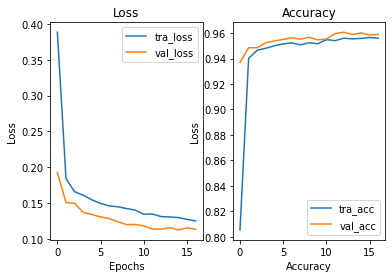

In [ ]:
# check out the loss curves of model
plot_loss_curves(history_04_00)

#### Results
Time training = 8,22 min. model_04_00 improves loss a little. accuracy value is almost the same. model_04_00 is the new model to beat.

## CNN model_05
Same as model_04_00 increasing the number of filters in each convolutional layer (from 32 to 64)

### Function create model (with data augmentation)

In [ ]:
def make_model():
  model = tf.keras.models.Sequential(
      [data_augmentation,
       tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='valid', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, IMG_DEPTH)),
       tf.keras.layers.MaxPooling2D((2, 2)),
       tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
       tf.keras.layers.MaxPooling2D((2, 2)),
       tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
       tf.keras.layers.MaxPooling2D((2, 2)),
       tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
       tf.keras.layers.MaxPooling2D((2, 2)),
       tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
       tf.keras.layers.MaxPooling2D((2, 2)),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(1, activation='sigmoid')])
  return model

### Train the model (with data augmentation)

In [ ]:
# set random seed
tf.random.set_seed(RANDOM_STATE)

# create the model
model_05_00 = make_model()

In [ ]:
# compile the model
model_05_00.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

In [ ]:
# create callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5)
]

In [ ]:
# fit the model
history_05_00 = model_05_00.fit(
    ds_train_batches,
    epochs=EPOCHS,
    validation_data=ds_val_batches,
    callbacks=callbacks)

Epoch 1/50
603/603 [==============================] - 32s 51ms/step - loss: 0.3204 - accuracy: 0.8553 - val_loss: 0.1859 - val_accuracy: 0.9378
Epoch 2/50
603/603 [==============================] - 30s 49ms/step - loss: 0.1793 - accuracy: 0.9442 - val_loss: 0.1492 - val_accuracy: 0.9530
Epoch 3/50
603/603 [==============================] - 30s 49ms/step - loss: 0.1678 - accuracy: 0.9464 - val_loss: 0.1434 - val_accuracy: 0.9501
Epoch 4/50
603/603 [==============================] - 30s 49ms/step - loss: 0.1621 - accuracy: 0.9494 - val_loss: 0.1479 - val_accuracy: 0.9490
Epoch 5/50
603/603 [==============================] - 30s 50ms/step - loss: 0.1584 - accuracy: 0.9500 - val_loss: 0.1395 - val_accuracy: 0.9512
Epoch 6/50
603/603 [==============================] - 31s 51ms/step - loss: 0.1542 - accuracy: 0.9498 - val_loss: 0.1325 - val_accuracy: 0.9525
Epoch 7/50
603/603 [==============================] - 30s 50ms/step - loss: 0.1464 - accuracy: 0.9529 - val_loss: 0.1426 - val_accuracy:

In [ ]:
model_05_00.evaluate(ds_test_batches)

87/87 [==============================] - 3s 35ms/step - loss: 0.1422 - accuracy: 0.9575


[0.1421869695186615, 0.9575471878051758]

In [ ]:
model_04_00.evaluate(ds_test_batches)

87/87 [==============================] - 3s 33ms/step - loss: 0.1227 - accuracy: 0.9594


[0.12267913669347763, 0.9593613743782043]

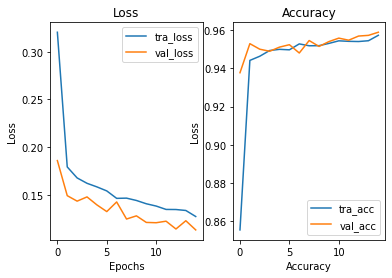

In [ ]:
# check out the loss curves of model
plot_loss_curves(history_05_00)

#### Results
Time training = 7,5 min. model_05_00 does not improve. model_04_00 is still the model to beat.

## CNN model_06
Same as model_04_00 with some padding configured for each convolutional layers. When we have information in our images that are close to the edge, we might want to use some padding.

### Function create model (with data augmentation)

In [ ]:
def make_model():
  model = tf.keras.models.Sequential(
      [data_augmentation,
       tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, IMG_DEPTH)),
       tf.keras.layers.MaxPooling2D((2, 2)),
       tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
       tf.keras.layers.MaxPooling2D((2, 2)),
       tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
       tf.keras.layers.MaxPooling2D((2, 2)),
       tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
       tf.keras.layers.MaxPooling2D((2, 2)),
       tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
       tf.keras.layers.MaxPooling2D((2, 2)),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(1, activation='sigmoid')])
  return model

### Train the model (with data augmentation)

In [ ]:
# set random seed
tf.random.set_seed(RANDOM_STATE)

# create the model
model_06_00 = make_model()

In [ ]:
# compile the model
model_06_00.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

In [ ]:
# create callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5)
]

In [ ]:
# fit the model
history_06_00 = model_06_00.fit(
    ds_train_batches,
    epochs=EPOCHS,
    validation_data=ds_val_batches,
    callbacks=callbacks)

Epoch 1/50
603/603 [==============================] - 30s 47ms/step - loss: 0.3409 - accuracy: 0.8327 - val_loss: 0.1732 - val_accuracy: 0.9408
Epoch 2/50
603/603 [==============================] - 29s 47ms/step - loss: 0.1606 - accuracy: 0.9497 - val_loss: 0.1578 - val_accuracy: 0.9467
Epoch 3/50
603/603 [==============================] - 28s 47ms/step - loss: 0.1525 - accuracy: 0.9517 - val_loss: 0.1408 - val_accuracy: 0.9499
Epoch 4/50
603/603 [==============================] - 28s 47ms/step - loss: 0.1472 - accuracy: 0.9519 - val_loss: 0.1294 - val_accuracy: 0.9566
Epoch 5/50
603/603 [==============================] - 29s 48ms/step - loss: 0.1402 - accuracy: 0.9548 - val_loss: 0.1274 - val_accuracy: 0.9552
Epoch 6/50
603/603 [==============================] - 28s 47ms/step - loss: 0.1350 - accuracy: 0.9557 - val_loss: 0.1315 - val_accuracy: 0.9539
Epoch 7/50
603/603 [==============================] - 28s 46ms/step - loss: 0.1316 - accuracy: 0.9558 - val_loss: 0.1225 - val_accuracy:

In [ ]:
model_06_00.evaluate(ds_test_batches)

87/87 [==============================] - 3s 34ms/step - loss: 0.1221 - accuracy: 0.9630


[0.12209631502628326, 0.962989866733551]

In [ ]:
model_05_00.evaluate(ds_test_batches)

87/87 [==============================] - 3s 36ms/step - loss: 0.1422 - accuracy: 0.9575


[0.1421869844198227, 0.9575471878051758]

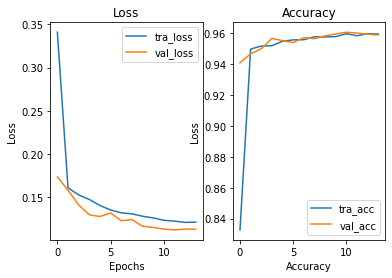

In [ ]:
# check out the loss curves of model
plot_loss_curves(history_06_00)

#### Results
Time training = 6,53 min. model_06_00 improves loss a little. accuracy value also improves a little. model_06_00 is the new model to beat.

## CNN model_07
Same as model_06_00 without EarlyStopping callback. Let's see if training for longer (50 epochs) gives better results.

### Function create model (with data augmentation)

In [ ]:
def make_model():
  model = tf.keras.models.Sequential(
      [data_augmentation,
       tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, IMG_DEPTH)),
       tf.keras.layers.MaxPooling2D((2, 2)),
       tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
       tf.keras.layers.MaxPooling2D((2, 2)),
       tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
       tf.keras.layers.MaxPooling2D((2, 2)),
       tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
       tf.keras.layers.MaxPooling2D((2, 2)),
       tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
       tf.keras.layers.MaxPooling2D((2, 2)),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(1, activation='sigmoid')])
  return model

### Train the model (with data augmentation)

In [ ]:
# set random seed
tf.random.set_seed(RANDOM_STATE)

# create the model
model_07_00 = make_model()

In [ ]:
# compile the model
model_07_00.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

In [ ]:
# fit the model
history_07_00 = model_07_00.fit(
    ds_train_batches,
    epochs=EPOCHS,
    validation_data=ds_val_batches)

Epoch 1/50
603/603 [==============================] - 30s 48ms/step - loss: 0.3391 - accuracy: 0.8269 - val_loss: 0.1799 - val_accuracy: 0.9385
Epoch 2/50
603/603 [==============================] - 29s 48ms/step - loss: 0.1624 - accuracy: 0.9501 - val_loss: 0.1559 - val_accuracy: 0.9463
Epoch 3/50
603/603 [==============================] - 29s 48ms/step - loss: 0.1545 - accuracy: 0.9515 - val_loss: 0.1456 - val_accuracy: 0.9492
Epoch 4/50
603/603 [==============================] - 29s 48ms/step - loss: 0.1458 - accuracy: 0.9537 - val_loss: 0.1313 - val_accuracy: 0.9550
Epoch 5/50
603/603 [==============================] - 29s 48ms/step - loss: 0.1403 - accuracy: 0.9547 - val_loss: 0.1249 - val_accuracy: 0.9555
Epoch 6/50
603/603 [==============================] - 29s 48ms/step - loss: 0.1346 - accuracy: 0.9557 - val_loss: 0.1220 - val_accuracy: 0.9568
Epoch 7/50
603/603 [==============================] - 29s 48ms/step - loss: 0.1339 - accuracy: 0.9558 - val_loss: 0.1327 - val_accuracy:

In [ ]:
model_07_00.evaluate(ds_test_batches)

87/87 [==============================] - 3s 32ms/step - loss: 0.1173 - accuracy: 0.9601


[0.11731141805648804, 0.9600870609283447]

In [ ]:
model_06_00.evaluate(ds_test_batches)

87/87 [==============================] - 3s 32ms/step - loss: 0.1221 - accuracy: 0.9630


[0.12209631502628326, 0.962989866733551]

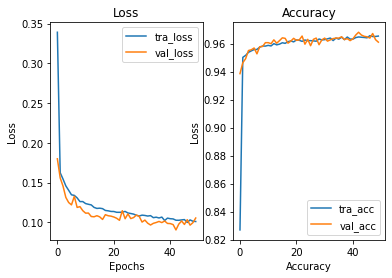

In [ ]:
# check out the loss curves of model
plot_loss_curves(history_07_00)

#### Results
Time training = 25 min. model_07_00 improves loss a little. accuracy value is almost the same. model_07_00 is the final model.